# Hierarchical Clustering.

This my kernel following the previous cluster analysis from scratch.You can consider seeing it first if you do not understand the concept of hierachical clustering .

This project also is a continuation of k-means clustering algorithm.I will use the same dataset i used previously in K-Means.This means that the exploratory data analysis part will be skipped because there is no need to repeat the same things.

# Business value.

The business value of this project is to categorize customers registered in this particular mall into simmilar categories based on their previous spending behaviour in this supermarket.The problem here is that the mall doesnt know what the groups.The number groups are also not known ahead of time.

In k-means we had specified 3 clusters,in this case however we are going to leave the algorithm to do that on its own.

# Loading libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data

Importinng the mall dataset with pandas.

In [5]:
df = pd.read_csv("/Users/admin/Downloads/PYTHON FOR DATA ANALYSIS/clustering/Mall_Customers.csv")

## Quick look into the data

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Feature Selection.

In this problem,the main features of interes will be annual income and spending score.

In [71]:
X = df.iloc[:,[3,4]].values

# Using a dendogram to find Optimal number of clusters

In [72]:
import scipy.cluster.hierarchy as sch

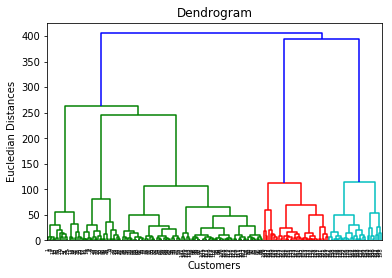

In [73]:
dendrogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian Distances")
plt.show()

Based on the above dendrogram,we can see that the data can be classified into 5 clusters.This is simmilar to the number of cluster that was identified using the elbow method using K-means clustering!Sounds good.

# Fitting Hierachical Clustering

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward')
#the "ward" linkage is used to minimize the zarince within the clusters.

In [79]:
y_hc = hc.fit_predict(X)

# Visualizing the clusters

Text(0.5, 0, 'Income')

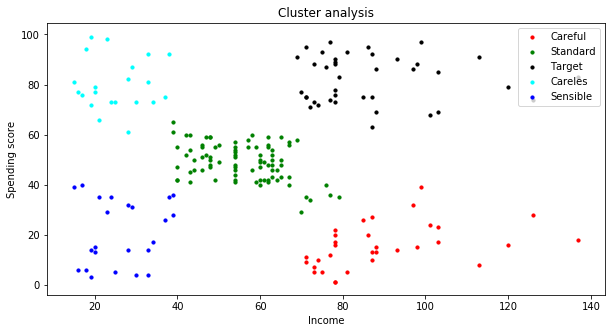

In [101]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_hc==0,0],X[y_hc == 0,1],s=10.0,c="red",label="Careful")
plt.scatter(X[y_hc==1,0],X[y_hc == 1,1],s=10.0,c="green",label="Standard")
plt.scatter(X[y_hc==2,0],X[y_hc == 2,1],s=10.0,c="black",label="Target")
plt.scatter(X[y_hc==3,0],X[y_hc == 3,1],s=10.0,c="cyan",label="Careles")
plt.scatter(X[y_hc==4,0],X[y_hc == 4,1],s=10.0,c="blue",label="Sensible")
plt.legend(loc=1)
plt.title("Cluster analysis")
plt.ylabel("Spending score")
plt.xlabel("Income")

**Observations and Inference**

- Customers marjed in red have one distinctive feature,we can say high income but lore pending score.I can call the carefull customers.

- In the middle with blue marks there are average earners but with average spending score,these i will categorise as standard customers.

- In the bottom rignt corner i can see customers with low income and low spending score marked with "cyan" colour,these can be grouped as sensible customers.

- Looking at the top right corner i can see the customers marked with green.These are customers with low income but high spending score.These i will group as careless cuatomers.

- Finaly there are custermers with high income and high spending score and high income.These are clustered as target customers.
